In [1]:
from sklearn.linear_model import LinearRegression,RidgeCV ,LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from collections import defaultdict


In [3]:
data_test = pd.read_pickle('data_test.pkl')
data_train = pd.read_pickle('data_train.pkl')

In [2]:
def get_metrics (act,pred):
    return r2_score(act,pred),RMSE(act,pred),mean_absolute_error(act,pred)


def RMSE (act,pred):
    return np.sqrt(np.mean((act-pred)**2))

seed = 111

In [4]:
def treat_features_logy (df):
    columns_to_keep = ['town','flat_type','storey','floor_area_sqm','Remaining_lease_years','num_schools',"school_rank_nearby","flat_model"]
    y = pd.Series(df['resale_price'].apply(lambda x: np.log(x)))
    x = pd.DataFrame(df[columns_to_keep])
    categorical_features = ['town','flat_type','school_rank_nearby','flat_model']
    X = pd.get_dummies(x,columns = categorical_features,drop_first = True)
    return X,y

In [8]:
def diagnostic_plot(y_true,y_pred):
    plt.figure(figsize=(15,6))
    
    plt.subplot(1, 2, 1)
    res = y_true - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

## Model performance

In [5]:
X_train,y_train = treat_features_logy(data_train)
X_test,y_test =treat_features_logy(data_test)

In [6]:
X = sm.add_constant(X_train)
X_pred = sm.add_constant(X_test)
model = sm.OLS(y_train,X)

results = model.fit()
results.summary()

C:\Users\Zhiqing\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     8816.
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        18:11:01   Log-Likelihood:                 40087.
No. Observations:               50528   AIC:                        -8.008e+04
Df Residuals:                   50482   BIC:                        -7.968e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.1833      0.009   1226.498      0.000      11.165      11.201
storey                                     0.0084   9.51e-05     88.684      0.000       0.008       0.009
floor_area_sqm                             0.0083   8.64e-05     96.220      0.000       0.008       0.008
Remaining_lease_years                      0.0099   7.45e-05    132.726      0.000       0.010       0.010
num_schools                                0.0046      0.000     17.717      0.000       0.004       0.005
town_BEDOK                                 0.0016      0.003      0.470      0.638      -0.005       0.008
town_BISHAN                                0.1787      0.004     41.113      0.000       0.170       0.187
town_BUKIT BATOK                          -0.1684      0.004    -45.169      0.000      -0.176      -0.161
town_BUKIT MERAH                           0.2206      0.004     62.169      0.000       0.214       0.228
town_BUKIT PANJANG                        -0.2533      0.004    -60.719      0.000      -0.261      -0.245
town_BUKIT TIMAH                           0.3759      0.009     40.508      0.000       0.358       0.394
town_CENTRAL AREA                          0.3146      0.007     43.893      0.000       0.301       0.329
town_CHOA CHU KANG                        -0.3385      0.004    -84.367      0.000      -0.346      -0.331
town_CLEMENTI                              0.1095      0.004     26.821      0.000       0.102       0.118
town_GEYLANG                               0.0878      0.004     21.361      0.000       0.080       0.096
town_HOUGANG                              -0.1691      0.003    -48.583      0.000      -0.176      -0.162
town_JURONG EAST                          -0.1074      0.004    -25.614      0.000      -0.116      -0.099
town_JURONG WEST                          -0.2688      0.003    -85.013      0.000      -0.275      -0.263
town_KALLANG/WHAMPOA                       0.1300      0.004     32.942      0.000       0.122       0.138
town_MARINE PARADE                         0.3655      0.007     53.118      0.000       0.352       0.379
town_PASIR RIS                            -0.1930      0.004    -48.673      0.000      -0.201      -0.185
town_PUNGGOL                              -0.2661      0.005    -53.127      0.000      -0.276      -0.256
town_QUEENSTOWN                            0.2569      0.004     62.082      0.000       0.249       0.265
town_SEMBAWANG                            -0.3845      0.004    -95.123      0.000      -0.392      -0.377
town_SENGKANG                             -0.3008      0.004    -71.949      0.000      -0.309      -0.293
town_SERANGOON                             0.0004      0.004      0.091      0.928     

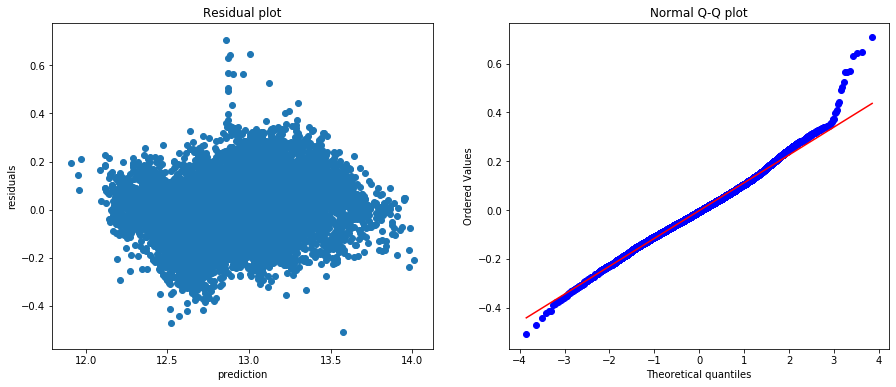

In [10]:
y_pred = results.predict(X_pred)
diagnostic_plot(y_test,y_pred)
plt.savefig("res_ylog_test.png")

In [12]:
lr_r2,lr_RMSE,lr_MAE = get_metrics(y_test,y_pred)

print('The R2 score is {:.3f} ,RMSE is {:.3f}, MAE is {:.3f}'.format(lr_r2,lr_RMSE,lr_MAE))

The R2 score is 0.885 ,RMSE is 0.114, MAE is 0.089


The errors of the final model is quite close to those of the validation's:
    The R2 score is 0.888 ,RMSE is 0.110, MAE is 0.086


Find below the final equation
# $y=e^{\beta_0 + \beta_1 X_{storey} + \beta_2 X_{floor area} + ...}$

In [31]:
ziplist = list(zip(y_test.index,y_test,y_pred))
results = pd.DataFrame(ziplist,columns = ['index','y_test','y_pred']).set_index('index')

In [33]:
results['residual'] = results['y_test'] - results['y_pred']

In [34]:
results

,y_test,y_pred,residual
index,,,
50528,12.180755,12.330236,-0.149482
50529,12.535376,12.604858,-0.069482
50530,12.676076,12.654648,0.021428
50531,12.563747,12.640210,-0.076463
50532,12.542545,12.597306,-0.054761
...,...,...,...
62405,13.034624,12.961085,0.073540
62406,13.244581,13.183473,0.061108
62407,13.195614,13.242472,-0.046858


In [36]:
results_sorted = results.sort_values(by="residual")

In [64]:
best_value = pd.DataFrame(data_test.loc[results_sorted.index[:10]])

In [65]:
worst_value = pd.DataFrame(data_test.loc[results_sorted.index[-10:]])

In [78]:
results_sorted['y_test_transformed'] = results_sorted.y_test.apply(lambda x: np.e**(x))
results_sorted['y_pred_transformed'] = results_sorted.y_pred.apply(lambda x: np.e**(x))

In [80]:
results_sorted['Res_absolute'] = results_sorted['y_test_transformed'] -results_sorted['y_pred_transformed']

In [82]:
results_sorted.tail(20)

,y_test,y_pred,residual,y_test_transformed,y_pred_transformed,Res_absolute
index,,,,,,
61057,13.586097,13.228149,0.357948,795000.0,555791.741444,239208.258556
57348,13.217674,12.858371,0.359302,550000.0,383989.806920,166010.193080
51183,13.473020,13.104320,0.368700,710000.0,491059.429238,218940.570762
52768,13.244581,12.873591,0.370990,565000.0,389878.605048,175121.394952
56518,13.664688,13.292218,0.372469,860000.0,592566.488039,267433.511961
54827,13.270783,12.872767,0.398016,580000.0,389557.644810,190442.355190
55081,13.624350,13.222171,0.402179,826000.0,552479.238280,273520.761720
50893,13.652992,13.244177,0.408815,850000.0,564771.777512,285228.222488
58613,13.331002,12.896427,0.434576,616000.0,398884.259680,217115.740320


In [81]:
results_sorted.head(20)

,y_test,y_pred,residual,y_test_transformed,y_pred_transformed,Res_absolute
index,,,,,,
56658,13.066851,13.575164,-0.508313,473000.0,786355.125472,-313355.125472
55108,12.055250,12.525614,-0.470364,172000.0,275299.206803,-103299.206803
55411,12.128111,12.569676,-0.441565,185000.0,287700.594387,-102700.594387
53701,12.200497,12.623085,-0.422588,198888.0,303484.338961,-104596.338961
52753,12.301383,12.717408,-0.416025,220000.0,333503.149228,-113503.149228
56039,12.100712,12.515018,-0.414306,180000.0,272397.542662,-92397.542662
51100,12.230765,12.618992,-0.388226,205000.0,302244.489187,-97244.489187
58913,12.345835,12.731059,-0.385225,230000.0,338087.321990,-108087.321990
54821,12.409013,12.787483,-0.378469,245000.0,357711.758646,-112711.758646


In [66]:
worst_value

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price,storey_groups
index,,,,,,,,,,,,,,
50843,2019-06-01,2019,06,BUKIT MERAH,3 ROOM,2,88.0,Standard,52.583333,161034,7.0,0,638000.0,0_LowFlr
54817,2019-08-01,2019,08,BUKIT MERAH,3 ROOM,2,88.0,Standard,52.416667,161036,7.0,0,645000.0,0_LowFlr
53455,2019-07-01,2019,07,KALLANG/WHAMPOA,3 ROOM,2,108.0,Terrace/Multi-Gen/Adjoined,52.916667,320053,9.0,1,845000.0,0_LowFlr
51441,2019-06-01,2019,06,KALLANG/WHAMPOA,3 ROOM,2,90.0,Terrace/Multi-Gen/Adjoined,52.083333,320051,9.0,1,750000.0,0_LowFlr
61341,2019-11-01,2019,11,KALLANG/WHAMPOA,3 ROOM,2,83.0,Terrace/Multi-Gen/Adjoined,51.666667,320039,9.0,1,705000.0,0_LowFlr
50845,2019-06-01,2019,06,BUKIT MERAH,3 ROOM,2,88.0,Standard,52.583333,161050,7.0,0,690000.0,0_LowFlr
51442,2019-06-01,2019,06,KALLANG/WHAMPOA,3 ROOM,2,79.0,Terrace/Multi-Gen/Adjoined,52.083333,320059,9.0,1,730000.0,0_LowFlr
61345,2019-11-01,2019,11,KALLANG/WHAMPOA,3 ROOM,2,81.0,Terrace/Multi-Gen/Adjoined,51.666667,320062,9.0,1,750000.0,0_LowFlr
57525,2019-09-01,2019,09,QUEENSTOWN,3 ROOM,2,87.0,Terrace/Multi-Gen/Adjoined,47.833333,142055,3.0,2,850000.0,0_LowFlr


In [67]:
best_value

,month,Year,Month,town,flat_type,storey,floor_area_sqm,flat_model,Remaining_lease_years,Postal_code,num_schools,school_rank_nearby,resale_price,storey_groups
index,,,,,,,,,,,,,,
56658,2019-09-01,2019,09,BISHAN,5 ROOM,11,136.0,Terrace/Multi-Gen/Adjoined,53.083333,570022,9.0,0,473000.0,1_MediumFlr
55108,2019-08-01,2019,08,GEYLANG,3 ROOM,11,60.0,Improved,49.500000,370085,5.0,0,172000.0,1_MediumFlr
55411,2019-08-01,2019,08,KALLANG/WHAMPOA,3 ROOM,11,56.0,Standard,50.416667,320028,9.0,1,185000.0,1_MediumFlr
53701,2019-07-01,2019,07,QUEENSTOWN,3 ROOM,2,60.0,Improved,50.666667,141169,4.0,2,198888.0,0_LowFlr
52753,2019-07-01,2019,07,BUKIT MERAH,3 ROOM,11,63.0,Standard,49.583333,160107,8.0,0,220000.0,1_MediumFlr
56039,2019-08-01,2019,08,TOA PAYOH,3 ROOM,2,67.0,Improved,49.416667,310126,8.0,0,180000.0,0_LowFlr
51100,2019-06-01,2019,06,GEYLANG,3 ROOM,2,66.0,Improved,61.583333,400021,5.0,0,205000.0,0_LowFlr
58913,2019-10-01,2019,10,CLEMENTI,3 ROOM,11,67.0,New Generation,60.000000,120714,4.0,1,230000.0,1_MediumFlr
54821,2019-08-01,2019,08,BUKIT MERAH,3 ROOM,14,65.0,Improved,55.333333,090013,6.0,0,245000.0,2_HighFlr


In [68]:
original_data = pd.read_pickle('df_final_cleaned.pkl')

In [76]:
original_data.loc[results_sorted.index[-20:]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_rank_nearby,Year,Month,low,high,storey,Remaining_years_y,Remaining_months,Remaining_years,Remaining_lease_years
index,,,,,,,,,,,,,,,,,,,,,
61057,2019-11,GEYLANG,4 ROOM,3,PINE CL,16 TO 18,95.0,Model A,2000,79 years 07 months,...,0,2019,11,16,18,17,79,7,79,79.583333
57348,2019-09,KALLANG/WHAMPOA,4 ROOM,69,MOULMEIN RD,07 TO 09,84.0,Improved,1972,51 years 10 months,...,0,2019,09,7,9,8,51,10,51,51.833333
51183,2019-06,HOUGANG,5 ROOM,122,HOUGANG AVE 1,01 TO 03,133.0,Improved-Maisonette,1983,63 years 03 months,...,0,2019,06,1,3,2,63,3,63,63.250000
52768,2019-07,BUKIT MERAH,3 ROOM,24,TIONG BAHRU RD,01 TO 03,88.0,Standard,1973,52 years 06 months,...,0,2019,07,1,3,2,52,6,52,52.500000
56518,2019-09,ANG MO KIO,5 ROOM,700C,ANG MO KIO AVE 6,10 TO 12,111.0,Improved,2003,82 years 09 months,...,0,2019,09,10,12,11,82,9,82,82.750000
54827,2019-08,BUKIT MERAH,3 ROOM,18,TIONG BAHRU RD,01 TO 03,88.0,Standard,1973,52 years 05 months,...,0,2019,08,1,3,2,52,5,52,52.416667
55081,2019-08,CLEMENTI,4 ROOM,441B,CLEMENTI AVE 3,07 TO 09,87.0,Model A,2012,91 years 11 months,...,1,2019,08,7,9,8,91,11,91,91.916667
50893,2019-06,BUKIT MERAH,5 ROOM,87,ZION RD,07 TO 09,117.0,Improved,1974,54 years,...,0,2019,06,7,9,8,54,0,54,54.000000
58613,2019-10,BUKIT MERAH,3 ROOM,34,KIM CHENG ST,04 TO 06,88.0,Standard,1973,52 years 03 months,...,0,2019,10,4,6,5,52,3,52,52.250000


In [71]:
np.e**0.4

1.4918246976412703

In [72]:
np.e**12.1

179871.8622537509

In [73]:
np.e**12.5

268337.2865208743

In [75]:
original_data.loc[results_sorted.index[:20]]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,school_rank_nearby,Year,Month,low,high,storey,Remaining_years_y,Remaining_months,Remaining_years,Remaining_lease_years
index,,,,,,,,,,,,,,,,,,,,,
56658,2019-09,BISHAN,5 ROOM,22,SIN MING RD,10 TO 12,136.0,Adjoined flat,1973,53 years 01 month,...,0,2019,09,10,12,11,53,1,53,53.083333
55108,2019-08,GEYLANG,3 ROOM,85,CIRCUIT RD,10 TO 12,60.0,Improved,1970,49 years 06 months,...,0,2019,08,10,12,11,49,6,49,49.500000
55411,2019-08,KALLANG/WHAMPOA,3 ROOM,28,JLN BAHAGIA,10 TO 12,56.0,Standard,1971,50 years 05 months,...,1,2019,08,10,12,11,50,5,50,50.416667
53701,2019-07,QUEENSTOWN,3 ROOM,169,STIRLING RD,01 TO 03,60.0,Improved,1970,50 years 08 months,...,2,2019,07,1,3,2,50,8,50,50.666667
52753,2019-07,BUKIT MERAH,3 ROOM,107,JLN BT MERAH,10 TO 12,63.0,Standard,1970,49 years 07 months,...,0,2019,07,10,12,11,49,7,49,49.583333
56039,2019-08,TOA PAYOH,3 ROOM,126,LOR 1 TOA PAYOH,01 TO 03,67.0,Improved,1970,49 years 05 months,...,0,2019,08,1,3,2,49,5,49,49.416667
51100,2019-06,GEYLANG,3 ROOM,21,EUNOS CRES,01 TO 03,66.0,Improved,1982,61 years 07 months,...,0,2019,06,1,3,2,61,7,61,61.583333
58913,2019-10,CLEMENTI,3 ROOM,714,CLEMENTI WEST ST 2,10 TO 12,67.0,New Generation,1980,60 years,...,1,2019,10,10,12,11,60,0,60,60.000000
54821,2019-08,BUKIT MERAH,3 ROOM,13,TELOK BLANGAH CRES,13 TO 15,65.0,Improved,1975,55 years 04 months,...,0,2019,08,13,15,14,55,4,55,55.333333
